<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме с hh.ru <center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Исследование структуры данных

In [3]:
hh_data = pd.read_csv('D:\Data\dst-3.0_16_1_hh.csv', sep=';')
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [8]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [9]:
hh_data.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

In [10]:
hh_data['Ищет работу на должность:'].value_counts(normalize=True, dropna=False).nlargest(1) # Определим какая должность в резюме встречается чаще всего

Ищет работу на должность:
Системный администратор    0.069261
Name: proportion, dtype: float64

In [11]:
lst = ['Неоконченное высшее образование', 'Среднее специальное образование', 'Высшее образование', 'Среднее образование'] # В признаке об образовании и ВУЗе оставим только информацию об образовании
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split(' ')[:3]))
hh_data['Образование'] = hh_data['Образование'].apply(lambda x: x if x in lst else ' '.join(x.split(' ')[:2]))
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее образование
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано,Высшее образование
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано,Среднее специальное образование
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано,Высшее образование
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано,Высшее образование


In [12]:
hh_data['Образование'].value_counts()

Образование
Высшее образование                 33863
Среднее специальное образование     5765
Неоконченное высшее образование     4557
Среднее образование                  559
Name: count, dtype: int64

In [13]:
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: 'М' if x.split(',')[0]=='Мужчина ' else 'Ж') # Признак Пол, возраст разобьем на 2 столбца, в одном будет пол, во втором возраст
hh_data['Пол'].value_counts(normalize=True).round(4)*100

Пол
М    80.93
Ж    19.07
Name: proportion, dtype: float64

In [14]:
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: x.split(',')[1].split(' ')[2])
hh_data['Возраст'] = hh_data['Возраст'].astype(int)
hh_data['Возраст'].mean().round(1)

np.float64(32.2)

In [15]:
hh_data_copy = hh_data.drop(['Образование и ВУЗ', 'Пол, возраст'], axis=1) # Удалим неинформативные столбцы

In [16]:
def get_experience(arg):    # Напишем функцию, которая будет рассчитывать опыт работы в месяцах
    if arg is np.nan:
        return np.nan
    if arg == 'Не указано':
        return np.nan
    else:
        month_key_words = ['месяц', 'месяцев', 'месяца']
        year_key_words = ['год', 'лет', 'года']
        args_splited = arg.split(' ')[:7]
        month = 0
        year = 0
        for i in range(len(args_splited)):
            if args_splited[i] in month_key_words:
                month = args_splited[i-1]
            if args_splited[i] in year_key_words:
                year = args_splited[i-1]
        return int(year)*12 + int(month)

hh_data_copy['Опыт работы (месяц)'] = hh_data_copy['Опыт работы'].apply(get_experience)
hh_data_copy['Опыт работы (месяц)'].median()

np.float64(100.0)

In [17]:
hh_data_copy = hh_data_copy.drop(['Опыт работы'], axis=1) # Удалим неинформативные столбцы

In [18]:
def cities(arg):    # Информацию о городе разобьем на 4 категории: Москва, Питер, город-миллионник и другие
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    city = arg.split(' , ')[0]
    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
    if city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
hh_data_copy['Город'] = hh_data_copy['Город, переезд, командировки'].apply(cities)
hh_data_copy.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее образование,М,39,202.0,другие
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование,М,60,233.0,другие
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное образование,Ж,36,123.0,другие
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее образование,М,38,225.0,другие
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее образование,Ж,26,67.0,Москва


In [19]:
hh_data_copy['Готовность к переезду'] = hh_data_copy['Город, переезд, командировки'].apply(lambda x: x.split(' , ')[-2]) # создадим отдельный признак-метку Готовность к переезду
hh_data_copy['Готовность к переезду'] = hh_data_copy['Готовность к переезду'].apply(lambda x: False if 'не готов' in x or 'не готова' in x else True)
hh_data_copy['Готовность к переезду'].value_counts()

Готовность к переезду
False    28719
True     16025
Name: count, dtype: int64

In [20]:
business_trips = ['готов к командировкам', 'готов к редким командировкам', 'готова к редким командировкам', 'готова к командировкам'] # создадим отдельный признак-метку Готовность к командировкам
hh_data_copy['Готовность к командировкам'] = hh_data_copy['Город, переезд, командировки'].apply(lambda x: x.split(' , ')[-1])
hh_data_copy['Готовность к командировкам'] = hh_data_copy['Готовность к командировкам'].apply(lambda x: True if x in business_trips else False)
hh_data_copy['Готовность к командировкам'].value_counts()

Готовность к командировкам
True     31640
False    13104
Name: count, dtype: int64

In [21]:
hh_data_copy['Город'].value_counts(normalize=True).round(2)*100

Город
Москва              37.0
другие              35.0
город-миллионник    16.0
Санкт-Петербург     11.0
Name: proportion, dtype: float64

In [22]:
round((hh_data_copy[(hh_data_copy['Готовность к переезду']==True) & (hh_data_copy['Готовность к командировкам']==True)].shape[0]*100/44744), 0)


32.0

In [23]:
hh_data_copy = hh_data_copy.drop(['Город, переезд, командировки'], axis=1)  # Удалим неинформативные столбцы

In [24]:
hh_data_copy['полная занятость'] = hh_data_copy['Занятость'].apply(lambda x: True if 'полная занятость' in x.split(', ') else False) # создадим дополнительные признаки-метки
hh_data_copy['полный день'] = hh_data_copy['График'].apply(lambda x: True if 'полный день' in x.split(', ') else False)
hh_data_copy['частичная занятость'] = hh_data_copy['Занятость'].apply(lambda x: True if 'частичная занятость' in x.split(', ') else False)
hh_data_copy['сменный график'] = hh_data_copy['График'].apply(lambda x: True if 'сменный график' in x.split(', ') else False)
hh_data_copy['проектная работа'] = hh_data_copy['Занятость'].apply(lambda x: True if 'проектная работа' in x.split(', ') else False)
hh_data_copy['гибкий график'] = hh_data_copy['График'].apply(lambda x: True if 'гибкий график' in x.split(', ') else False)
hh_data_copy['волонтерство'] = hh_data_copy['Занятость'].apply(lambda x: True if 'волонтерство' in x.split(', ') else False)
hh_data_copy['удаленная работа'] = hh_data_copy['График'].apply(lambda x: True if 'удаленная работа' in x.split(', ') else False)
hh_data_copy['стажировка'] = hh_data_copy['Занятость'].apply(lambda x: True if 'стажировка' in x.split(', ') else False)
hh_data_copy['вахтовый метод'] = hh_data_copy['График'].apply(lambda x: True if 'вахтовый метод' in x.split(', ') else False)

In [25]:
hh_data_copy[(hh_data_copy['вахтовый метод']==True) & (hh_data_copy['гибкий график']==True)].shape[0]

2311

In [26]:
hh_data_copy = hh_data_copy.drop(['Занятость', 'График'], axis=1) # Удалим неинформативные столбцы

In [4]:
exchenge_rate = pd.read_csv('D:\Data\ExchangeRates.csv', sep=',')  # таблица с данными о курсах валют https://drive.google.com/file/d/1Th5J1wUAEd9RJ81kGFFV5o35pqSNzHr2/view?usp=sharing
exchenge_rate.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1


In [28]:
exchenge_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    5664 non-null   object 
 1   per         5664 non-null   object 
 2   date        5664 non-null   object 
 3   time        5664 non-null   object 
 4   close       5664 non-null   float64
 5   vol         5664 non-null   int64  
 6   proportion  5664 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 309.9+ KB


In [29]:
hh_data_copy['Обновление резюме'] = pd.to_datetime(hh_data_copy['Обновление резюме'], dayfirst=True).dt.date  # переведем информацию об обновлении резюме в формат datetime
exchenge_rate['date'] = pd.to_datetime(exchenge_rate['date'], dayfirst=True).dt.date # переведем информацию об дате курса валют в формат datetime

C:\Users\1\AppData\Local\Temp\ipykernel_6116\3318345428.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchenge_rate['date'] = pd.to_datetime(exchenge_rate['date'], dayfirst=True).dt.date # переведем информацию об дате курса валют в формат datetime


In [30]:
currency = {'руб.':'RUB', 'KZT':'KZT', 'USD':'USD', 'EUR':'EUR', 'бел.руб.':'BYN', 'грн.':'UAH', 'сум':'UZS', 'KGS':'KGS', 'AZN':'AZN'} # выделим в отдельный столбец информацию о сумме ЗП
hh_data_copy['currency'] = hh_data_copy['ЗП'].apply(lambda x: currency[x.split(' ')[1]])
hh_data_copy['ЗП сумм'] = hh_data_copy['ЗП'].apply(lambda x: x.split(' ')[0])
hh_data_copy['currency'].value_counts()

currency
RUB    42471
KZT     1108
USD      628
BYN      329
EUR      106
UAH       73
UZS       20
KGS        6
AZN        3
Name: count, dtype: int64

In [31]:
exchenge_rate = exchenge_rate.drop(['per', 'time', 'vol'], axis=1)  # Удалим неинформативные столбцы

In [32]:
hh_data_merged = hh_data_copy.merge(exchenge_rate, how='left', left_on=['Обновление резюме', 'currency'], right_on=['date', 'currency']) # добавим в нашу таблицу информацию о курсе валют 
hh_data_merged.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,гибкий график,волонтерство,удаленная работа,стажировка,вахтовый метод,currency,ЗП сумм,date,close,proportion
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее образование,М,39,202.0,...,True,False,True,False,True,RUB,29000,NaN,NaN,NaN
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее образование,М,60,233.0,...,True,False,True,False,False,RUB,40000,NaN,NaN,NaN
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное образование,Ж,36,123.0,...,False,False,False,False,False,RUB,20000,NaN,NaN,NaN
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее образование,М,38,225.0,...,True,False,True,False,False,RUB,100000,NaN,NaN,NaN
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее образование,Ж,26,67.0,...,False,False,False,False,False,RUB,140000,NaN,NaN,NaN


In [33]:
hh_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

In [34]:
hh_data_merged['ЗП сумм'] = hh_data_merged['ЗП сумм'].astype(float)
values = { 'close': 1, 'proportion': 1} # заполним пропуски в таблице единицами
hh_data_merged= hh_data_merged.fillna(values)

In [35]:
hh_data_merged['ЗП (руб)'] = hh_data_merged['ЗП сумм']*hh_data_merged['close']/hh_data_merged['proportion'] # ЗП для всех соискателей переведем по курсу в рубли
hh_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

In [36]:
hh_data_merged['ЗП (руб)'].median()

np.float64(59019.0)

In [37]:
hh_data_merged = hh_data_merged.drop(['ЗП', 'currency', 'ЗП сумм', 'date', 'close', 'proportion'], axis=1) # Удалим неинформативные столбцы
hh_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

# Исследование зависимостей в данных

C:\Users\1\AppData\Local\Temp\ipykernel_31556\710492859.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\1\AppData\Local\Temp\ipykernel_31556\710492859.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


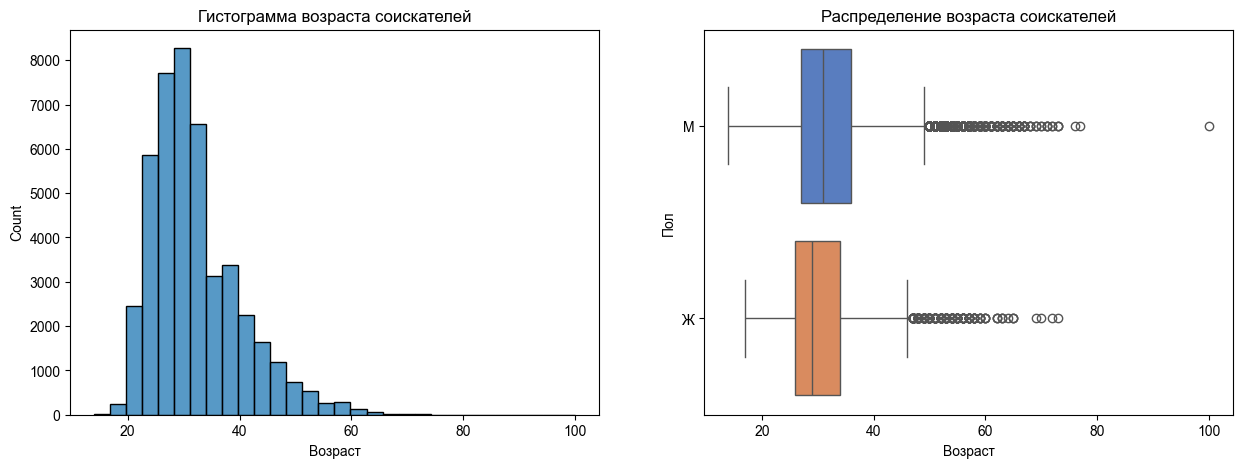

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Построим гистограмму и коробчатую диаграмму распределения возраста соискателей
sns.histplot(
    data=hh_data_merged,
    x='Возраст',
    palette='muted',
    bins=30,
    ax=axes[0]
);
axes[0].set_title('Гистограмма возраста соискателей');
sns.boxplot(
    data=hh_data_merged,
    y='Пол',
    x='Возраст',
    palette='muted',
    orient='h',
    ax=axes[1]
);
sns.set_style("whitegrid")
axes[1].set_title('Распределение возраста соискателей');

In [36]:
hh_data_merged["Возраст"].mode()

0    30
Name: Возраст, dtype: int64

In [45]:
hh_data_merged.groupby(['Пол'])["Возраст"].quantile(0.75)

Пол
Ж    34.0
М    36.0
Name: Возраст, dtype: float64

#### 1. Анализ возраста соискателей
##### Как видно из представленных графиков, среди соискателей наиболее часто встречаются кондидаты в возрасте 30 лет. При этом медианный возраст у женщин - 29 лет, а у мужчин - 31 год. Также межквартирльный размах у мужчин шире - от 14 до 49 лет, а у женщин от 17 до 45 лет. Если посмотреть на коробчатую диаграмму, то всех соискателей старше 49 лет у мужчин и 45 лет у женщин пометили как аномалии (выбросы). Однако, учитывая, что в 2019 году в России пенсионный возраст у мужчин был увеличен до 65 лет, а у женщин до 60 лет, на текущий период указанные возрастные границы не могут являться выбросами, так как это возраст трудоспособного населения. Также на графике видно, что среди соискателей есть мужчина в возрасте 100 лет и эти данные требуют дополнительной проверки.

C:\Users\1\AppData\Local\Temp\ipykernel_31556\3965878539.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\1\AppData\Local\Temp\ipykernel_31556\3965878539.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


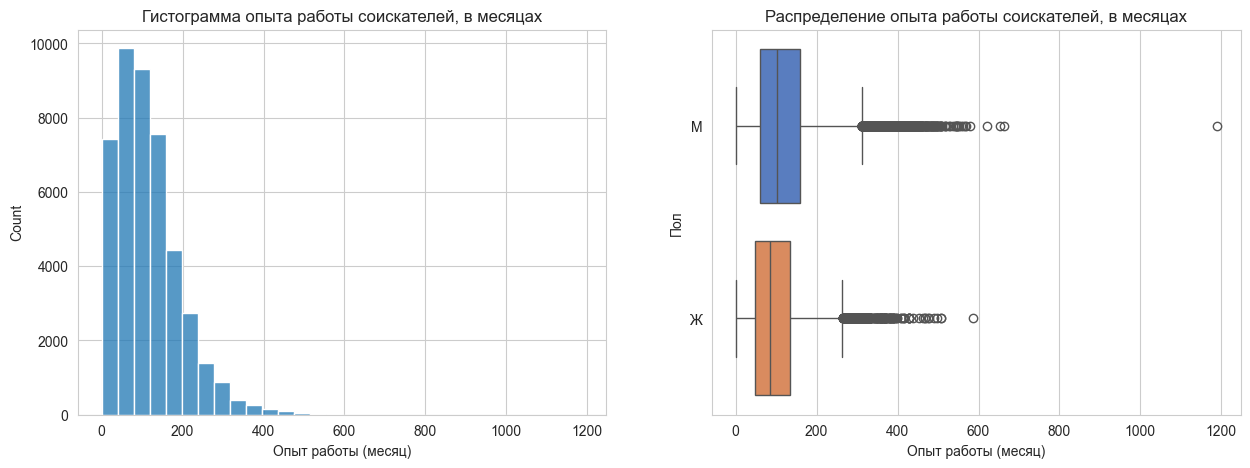

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Построим гистограмму и коробчатую диаграмму распределения опыта соискателей
sns.histplot(
    data=hh_data_merged,
    x='Опыт работы (месяц)',
    palette='muted',
    bins=30,
    ax=axes[0]
);
axes[0].set_title('Гистограмма опыта работы соискателей, в месяцах');
sns.boxplot(
    data=hh_data_merged,
    y='Пол',
    x='Опыт работы (месяц)',
    palette='muted',
    orient='h',
    ax=axes[1]
)
sns.set_style("whitegrid")
axes[1].set_title('Распределение опыта работы соискателей, в месяцах');

In [52]:
hh_data_merged["Опыт работы (месяц)"].mode()

0    81.0
Name: Опыт работы (месяц), dtype: float64

In [50]:
hh_data_merged.groupby(['Пол'])["Опыт работы (месяц)"].median()

Пол
Ж     85.0
М    103.0
Name: Опыт работы (месяц), dtype: float64

#### 2. Анализ опыта работы соискателей
##### Графики анализа опыта работы показывают, что наиболее часто встречаются соискатели с опытом работы 81 месяц (чуть меньше 7 лет). Медианный опыт работы среди женщин - 7 лет, а среди мужчин - 8,5 лет. Большинство значений у мужчин находися в интервале от 0 до 300 месяцев (25 лет), у женщин от 0 до 280 месяцев (23 лет). На коробчатой диаграмме явно видно аномальное максимальное значение 1188 месяцев, что соответствует 99 годам опыта работы соискателя.

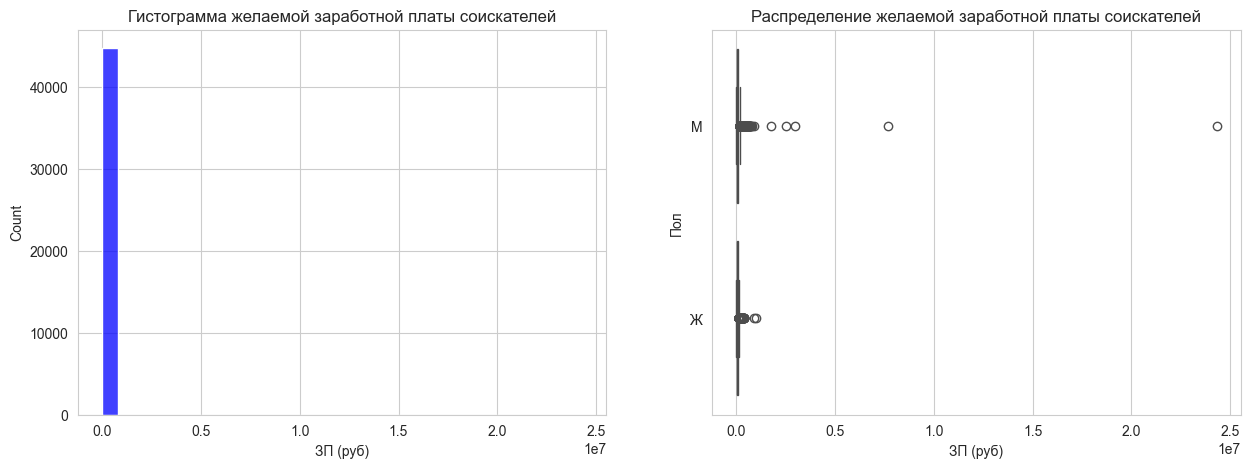

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Построим гистограмму и коробчатую диаграмму распределения ЗП соискателей
sns.histplot(
    data=hh_data_merged,
    x='ЗП (руб)',
    color='blue',
    bins=30,
    ax=axes[0]
);
axes[0].set_title('Гистограмма желаемой заработной платы соискателей');
sns.boxplot(
    data=hh_data_merged,
    y='Пол',
    x='ЗП (руб)',
    color='blue',
    orient='h',
    ax=axes[1]
)
sns.set_style("whitegrid")
axes[1].set_title('Распределение желаемой заработной платы соискателей');

In [54]:
hh_data_merged["ЗП (руб)"].mode()

0    50000.0
Name: ЗП (руб), dtype: float64

##### Анализ желаемой заработной платы соискателей лучше проводить исключив аномальные значения, так как максимальное значение превышает 24 млн.руб, что делает графики не пригодными для корректного анализа.

In [36]:
hh_data_cleaned = hh_data_merged[hh_data_merged["ЗП (руб)"] < 1000000]  # исключим из данных для построения графиков соискателей, чьи запросы по ЗП 1 млн руб и выше


In [123]:
hh_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44738 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44738 non-null  object 
 1   Последнее/нынешнее место работы  44737 non-null  object 
 2   Последняя/нынешняя должность     44736 non-null  object 
 3   Обновление резюме                44738 non-null  object 
 4   Авто                             44738 non-null  object 
 5   Образование                      44738 non-null  object 
 6   Пол                              44738 non-null  object 
 7   Возраст                          44738 non-null  int64  
 8   Опыт работы (месяц)              44568 non-null  float64
 9   Город                            44738 non-null  object 
 10  Готовность к переезду            44738 non-null  bool   
 11  Готовность к командировкам       44738 non-null  bool   
 12  полная занятость       

C:\Users\1\AppData\Local\Temp\ipykernel_31556\691306406.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\1\AppData\Local\Temp\ipykernel_31556\691306406.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


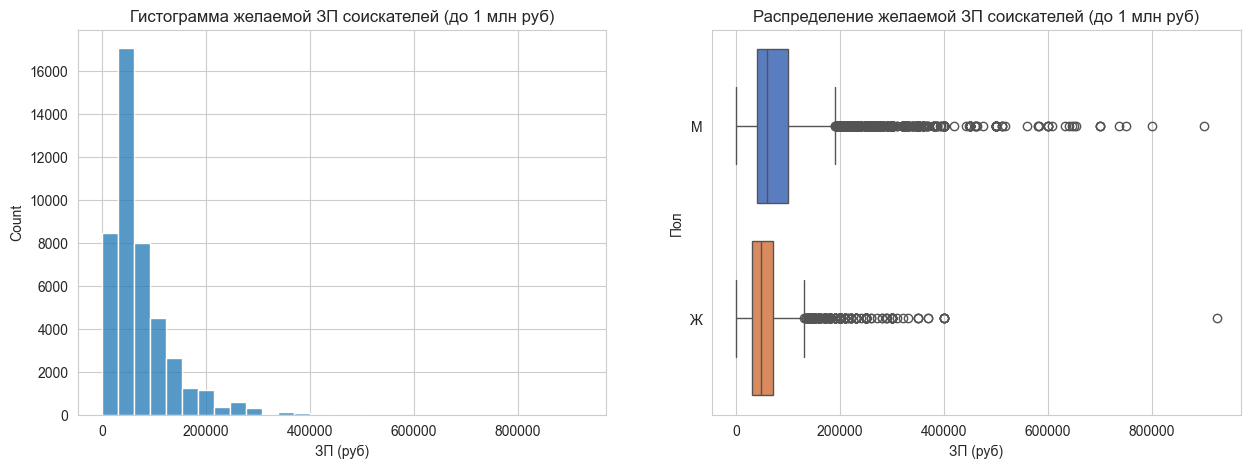

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5)) # Построим гистограмму и коробчатую диаграмму распределения ЗП соискателей исключив самые высокие зарплаты
sns.histplot(
    data=hh_data_cleaned,
    x='ЗП (руб)',
    palette='muted',
    bins=30,
    ax=axes[0]
);
axes[0].set_title('Гистограмма желаемой ЗП соискателей (до 1 млн руб)');
sns.boxplot(
    data=hh_data_cleaned,
    y='Пол',
    x='ЗП (руб)',
    palette='muted',
    orient='h',
    ax=axes[1]
);
sns.set_style("whitegrid")
axes[1].set_title('Распределение желаемой ЗП соискателей (до 1 млн руб)');

#### 3. Анализ заработной платы соискателей
##### Модальное значение желаемой заработной платы соискателей составляет 50 тыс.рублей, при этом запросы по заработной плате большинства соискателей не превышают 95 тыс.руб. Медианное значение по ЗП у мужчин выше, чем у женщин.

In [84]:
education = hh_data_cleaned.groupby(['Образование'])["ЗП (руб)"].min()
education

Образование
Высшее образование                   1.0
Неоконченное высшее образование      1.0
Среднее образование                250.0
Среднее специальное образование      1.0
Name: ЗП (руб), dtype: float64

C:\Users\1\AppData\Local\Temp\ipykernel_31556\3288809143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


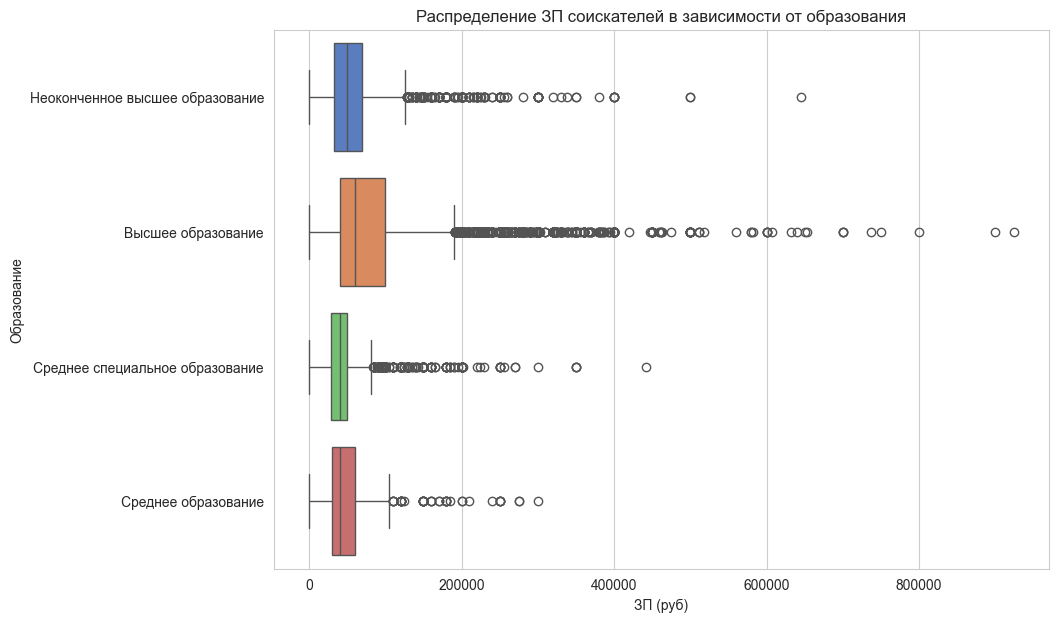

In [ ]:
fig = plt.figure(figsize=(10,7))    # Построим коробчатую диаграмму распределения ЗП соискателей в зависимости от образования
boxplot = sns.boxplot(data=hh_data_cleaned,
    y='Образование',
    x='ЗП (руб)',
    orient='h',
    palette='muted'
);
sns.set_style("whitegrid")
boxplot.set_title('Распределение ЗП соискателей в зависимости от образования');

#### 4. Зависимость заработной платы соискателей от уровня образования
##### Самое низкое медианное значение желаемой заработной - 40 тыс руб у соискателей со средним и средне-специальным бразованием. При этом минимальное значение по ЗП у всех категорий одинаковое, около 0. Самое высокое медианное значение у категории Высшее образование. Также у данной категории самые высокие значения межквартильного размха и уровни заработной платы, определяемые как аномальные. Данный признак является значимым при построении прогнозов по определению уровня заработной платы.

C:\Users\1\AppData\Local\Temp\ipykernel_31556\1632236983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


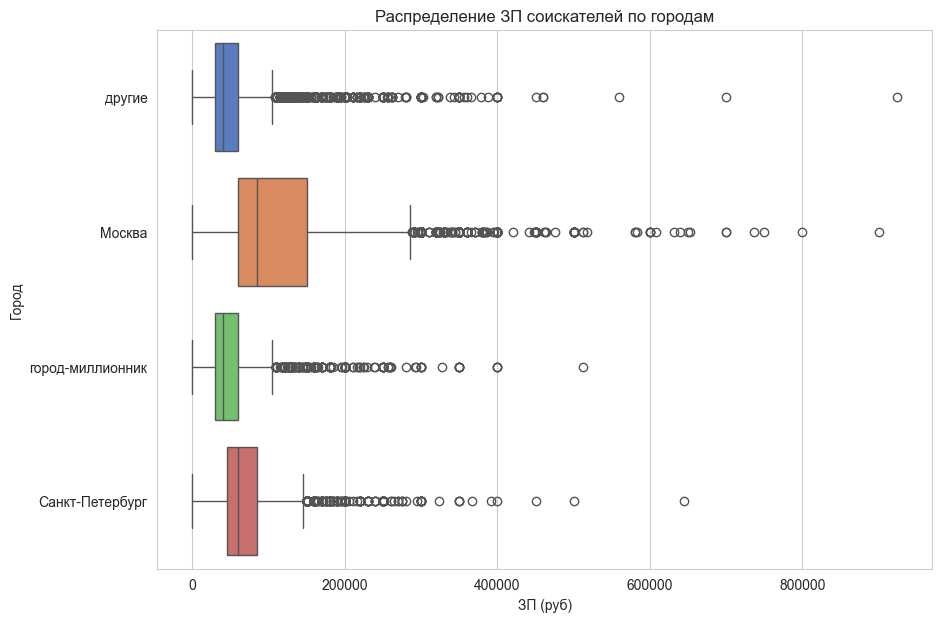

In [ ]:
fig = plt.figure(figsize=(10,7))   # Построим коробчатую диаграмму распределения ЗП соискателей по городам
boxplot = sns.boxplot(
    data=hh_data_cleaned,
    y='Город',
    x='ЗП (руб)',
    orient='h',
    palette='muted'
);
sns.set_style("whitegrid")
boxplot.set_title('Распределение ЗП соискателей по городам');

#### 5. Анализ заработной платы соискателей по городам
##### Самое низкое медианное значение желаемой заработной платы - 40 тыс руб в категориях город-милионник и другие, далее следует Санкт-Петербург с уровнем 60 тыс руб и Москва с уровнем 85 тыс рублей. Самый большой межквартильный размах наблюдается также в Москве.

In [91]:
hh_data_cleaned.groupby(['Город'])["ЗП (руб)"].median()

Город
Москва              85000.0
Санкт-Петербург     60000.0
город-миллионник    40000.0
другие              40000.0
Name: ЗП (руб), dtype: float64

In [40]:
bar_data = hh_data_cleaned.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median().round()

moving = {False: 'Не готов', True: 'Готов'}
bar_data['Готовность к переезду'] = bar_data['Готовность к переезду'].map(moving)
bar_data['Готовность к командировкам'] = bar_data['Готовность к командировкам'].map(moving)

bar_data

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,Не готов,Не готов,40000.0
1,Не готов,Готов,60000.0
2,Готов,Не готов,50000.0
3,Готов,Готов,65535.0


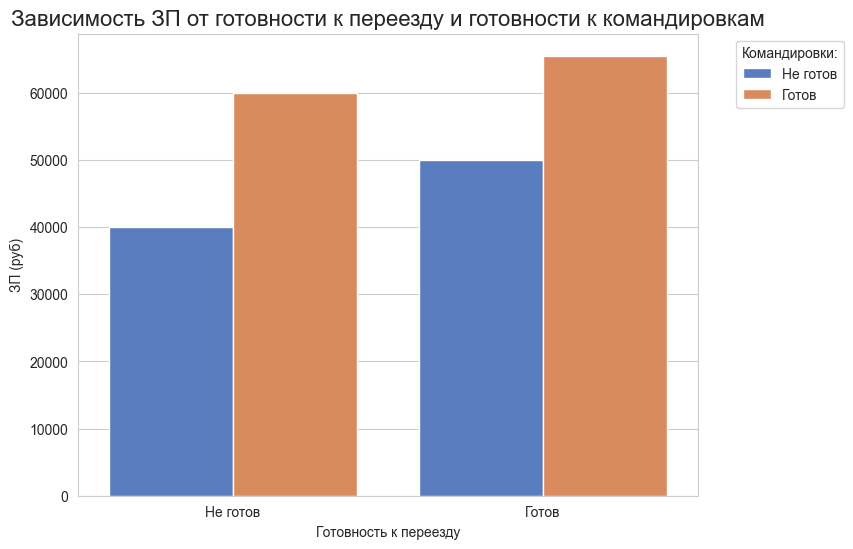

In [88]:
fig = plt.figure(figsize=(8, 6))     # Построим столбчатую диаграмму зависимости ЗП от готовности к переезду и готовности к командировкам
barplot = sns.barplot(data=bar_data,
    x='Готовность к переезду',
    y='ЗП (руб)',    
    hue='Готовность к командировкам',
    palette='muted'
    )

sns.set_style("whitegrid")
plt.title('Зависимость ЗП от готовности к переезду и готовности к командировкам', fontsize=16)
plt.legend(title='Командировки:', bbox_to_anchor=(1.05, 1));


#### 6. Зависимость средней ЗП от готовности к переезду и к командировкам
##### Как видно из графика сотрудники не готовые к переезду и к командировкам получают самую низкую заработную плату. Выше по уровню ЗП идут те, кто готовы к переезду, но не готовы к командировкам. Далее идут те, кто не готовы к переезду, но готовы к командировкам. И самый высокий уровень заработной платы у сотрудников, согласных на переезд и командировки.

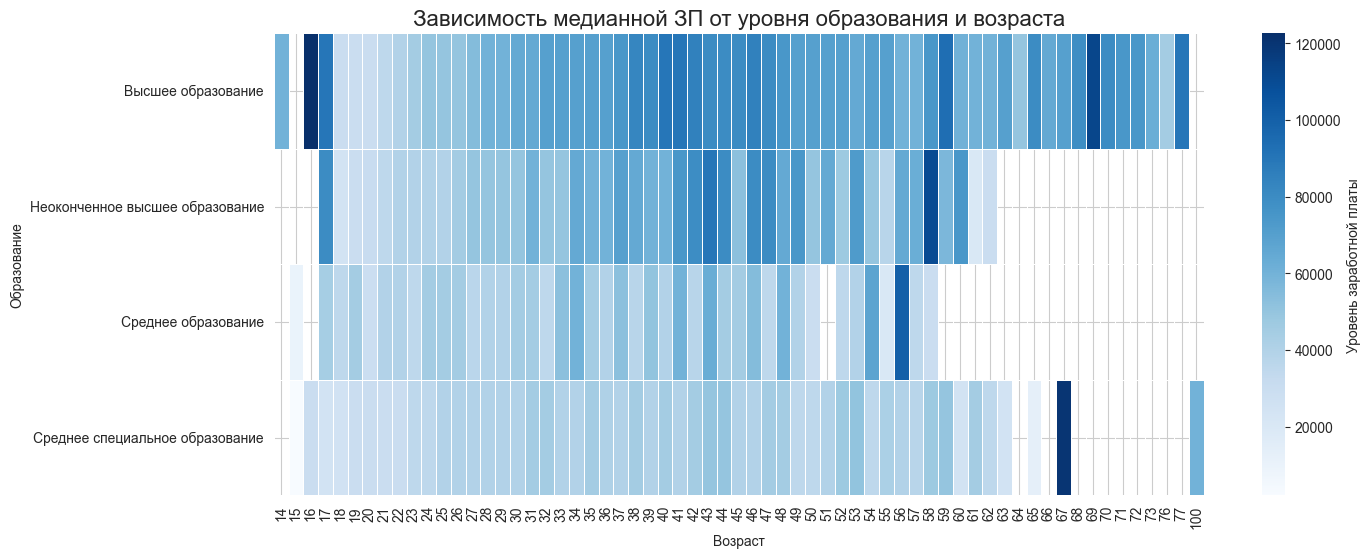

In [42]:
hh_pivot = hh_data_cleaned.pivot_table(values='ЗП (руб)',  # построим сводную таблицу зависимости медианной ЗП от уровня образования и возраста
                                       index='Образование',
                                       columns='Возраст',
                                       aggfunc='median'
                                       )

f, ax = plt.subplots(figsize=(15, 6)) # Строим тепловую карту
fig_7 = sns.heatmap(hh_pivot, cmap='Blues',                       
                     linewidths=.5, ax=ax, 
                     cbar_kws={'label': 'Уровень заработной платы'})
plt.title('Зависимость медианной ЗП от уровня образования и возраста', fontsize=16)
plt.ylabel('Образование')
plt.xlabel('Возраст');

#### 7. Зависимость заработной платы от образования и возраста
##### Сравнение заработной платы соискателей с разным уровнем образовнаия показывает, что кандидаты с высшим образованием получают более высокие зарплаты и происходит это раньше, чем у соискателей из других категорий. На высокие зарплаты могут расчитывать только специалисты без высшего образования в возрасте более 56 лет, имеющие высоко востребованные технические специальности и таких специалистов единицы. Также следует заметить, что среди соискателей старше 60 лет очень мало кандидатов не имеющих высшего образования. А среди спецаилистов с высшим образованием резюме представлены практически во всех возрастных категориях до 77 лет включительно.

In [43]:
hh_data_cleaned['Опыт работы (лет)'] = round(hh_data_cleaned['Опыт работы (месяц)']/12, 0)

C:\Users\1\AppData\Local\Temp\ipykernel_31556\1193972833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_data_cleaned['Опыт работы (лет)'] = round(hh_data_cleaned['Опыт работы (месяц)']/12, 0)


In [124]:
hh_data_cleaned.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,сменный график,проектная работа,гибкий график,волонтерство,удаленная работа,стажировка,вахтовый метод,ЗП (руб),Опыт работы (лет)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее образование,М,39,202.0,другие,...,True,True,True,True,False,True,False,True,29000.0,17.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее образование,М,60,233.0,другие,...,True,True,True,True,False,True,False,False,40000.0,19.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное образование,Ж,36,123.0,другие,...,False,False,False,False,False,False,False,False,20000.0,10.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее образование,М,38,225.0,другие,...,True,False,True,True,False,True,False,False,100000.0,19.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее образование,Ж,26,67.0,Москва,...,False,False,False,False,False,False,False,False,140000.0,6.0


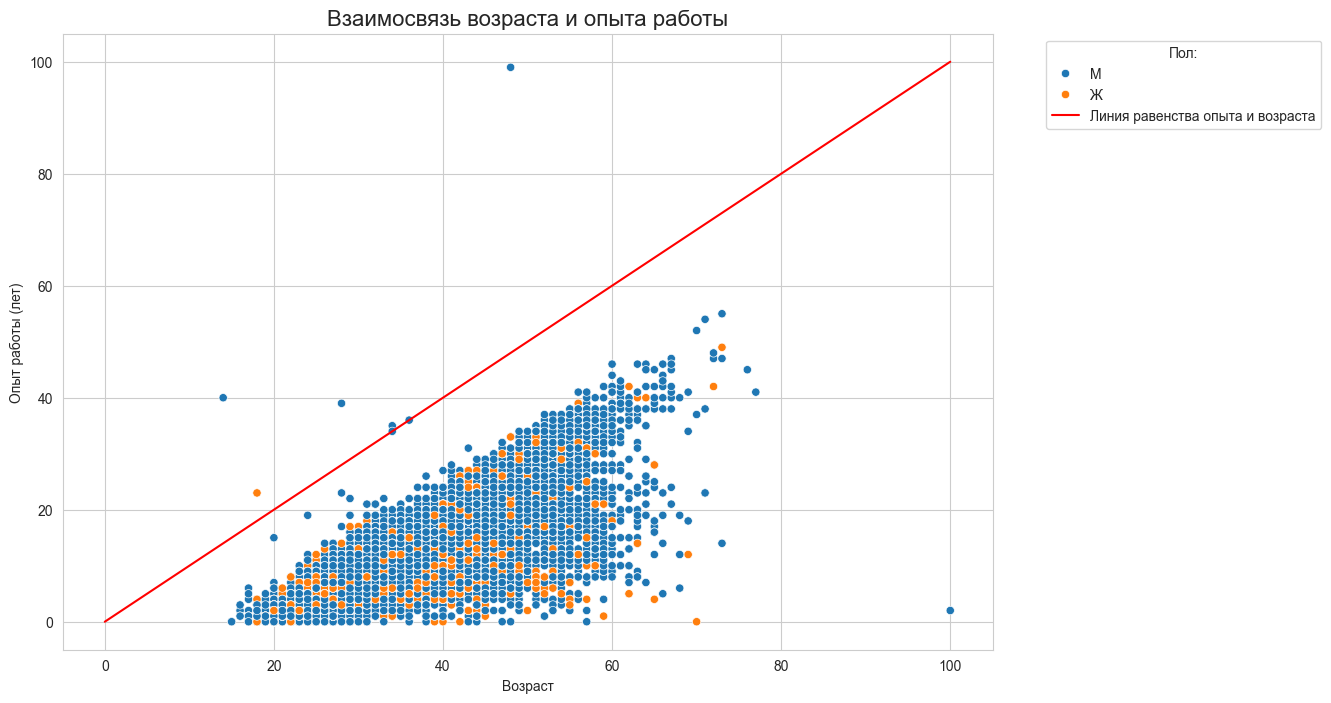

In [ ]:
plt.figure(figsize=(12, 8)) 
sns.scatterplot(data=hh_data_cleaned,  # Строим диаграмму рассяния
    y='Опыт работы (лет)',
    x='Возраст',
    hue='Пол'
)
plt.plot([0, 100], [0, 100], color='red', label='Линия равенства опыта и возраста') # Добавляем на график линию равенства показателей
plt.title('Взаимосвязь возраста и опыта работы', fontsize=16)
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (лет)')
plt.legend(title='Пол:', bbox_to_anchor=(1.05, 1));

#### 8. Зависимость опыта работы от возраста
##### На графике представлены данные о возрасте и опыте соискателей. Большинство значений расположены ниже красной линии, которая обозначает равенство возраста и опыта работы. Рассуждая логически, соискатели не могут иметь опыт работы равный возрасту, поэтому все значения, которые лежат на указанной линии, либо расположены выше нее, можно считать выбросами. Также интересно заметить, что на графике много значений, расположенных на нулевой отметке опыта работы, что соответсвует большому количеству соискателей (доля мужчин среди них преобладает) различных возрастов не имеющих опыт работы, либо имеющих минимальный опыт работы. Возможно, одной из причин такой ситуации может быть неофициальное трудоустройство.

In [45]:
data = hh_data_merged[hh_data_merged['Опыт работы (месяц)']/12 > hh_data_merged['Возраст']]
data

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полный день,частичная занятость,сменный график,проектная работа,гибкий график,волонтерство,удаленная работа,стажировка,вахтовый метод,ЗП (руб)
4535,Технический специалист,а,а,2019-04-11,Не указано,Среднее специальное образование,Ж,18,271.0,другие,...,False,True,True,True,False,False,True,False,False,15000.0
19351,Специалист (Junior-программист),"Русский свет, ООО",Электрик,2019-04-26,Не указано,Высшее образование,М,28,470.0,другие,...,True,False,False,False,False,False,False,False,False,20000.0
19872,Аналитик,Kyivstar,Фахівець з опису бізнес процесів,2019-04-26,Не указано,Высшее образование,М,34,416.0,другие,...,True,False,False,False,False,False,False,False,False,60740.5
26477,Менеджер IT-проектов,"М©й IT'M (""Информационные Технологии' Менеджм...",Основатель,2019-04-08,Не указано,Высшее образование,М,34,411.0,Санкт-Петербург,...,True,True,True,True,True,True,True,True,True,80000.0
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,Высшее образование,М,14,477.0,Москва,...,True,False,False,False,False,False,False,False,False,60000.0
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,Высшее образование,М,48,1188.0,город-миллионник,...,True,True,False,False,True,False,True,False,True,60000.0
43451,Руководитель отдела разработки,ЛАНИТ,Руководитель проекта,2018-08-17,Не указано,Высшее образование,М,36,434.0,Москва,...,True,False,False,False,False,False,False,False,False,200000.0


Text(0.5, 36.72222222222221, 'Опыт работы (лет)')

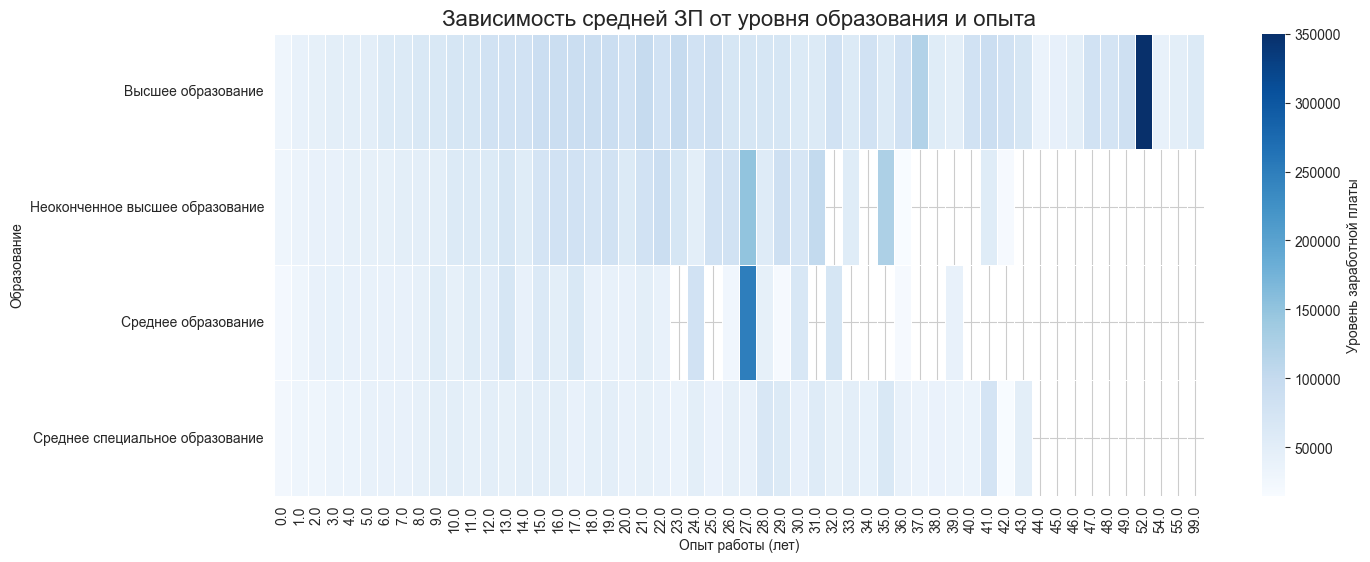

In [48]:
hh_pivot = hh_data_cleaned.pivot_table(values='ЗП (руб)',  # построим сводную таблицу зависимости средней ЗП от уровня образования и опыта
                                       index='Образование',
                                       columns='Опыт работы (лет)',
                                       aggfunc='median'
                                       )

f, ax = plt.subplots(figsize=(15, 6)) # Строим тепловую карту
fig_7 = sns.heatmap(hh_pivot, cmap='Blues',                       
                     linewidths=.5, ax=ax, 
                     cbar_kws={'label': 'Уровень заработной платы'})
plt.title('Зависимость средней ЗП от уровня образования и опыта', fontsize=16)
plt.ylabel('Образование')
plt.xlabel('Опыт работы (лет)')

#### 9. Зависимость заработной платы от образования и опыта работы
##### Анализируя график можно заметить, что кандидаты с высшим образованием представлены практически во всех категориях опыта работы от 0 до 55 лет. А у спецаилистов без высшего образования  после 40 лет попадаются только единичные резюме, а после 43 лет опыта кандидатов уже не встречается вовсе. Как можно было предположить изначально, с увеличенсием опыта растет и уровень зарплаты. Также привлекает внимание несколько категорий среди специалистов с неоконченным высшим и средним образованием, имеющих опыт работы 27 лет с заработком более 150 тыс руб, вероятнее всего, таких кандидатов единицы.

C:\Users\1\AppData\Local\Temp\ipykernel_31556\2711794377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


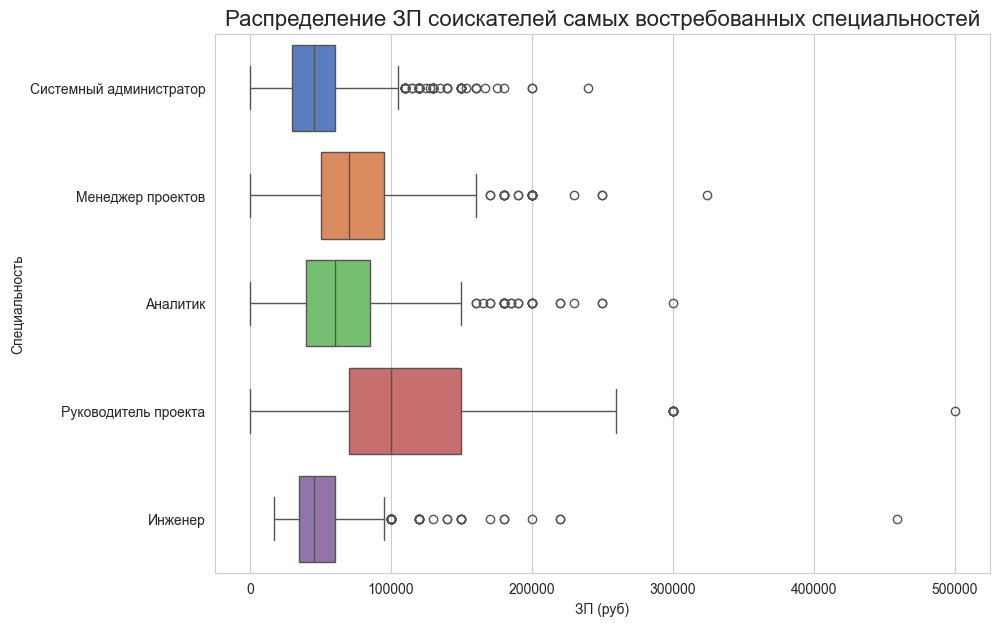

In [ ]:
demand_specialties = hh_data_cleaned['Ищет работу на должность:'].value_counts(normalize=True, dropna=False).nlargest(5).index.to_list() # выберем 5 наиболее востребованных специальностей
hh_demand_specialties = hh_data_cleaned[hh_data_cleaned['Ищет работу на должность:'].isin(demand_specialties)] # построим график по наиболее востребованным специальностям

fig = plt.figure(figsize=(10,7))   # Построим коробчатую диаграмму распределения ЗП соискателей самых востребованных специальностей
boxplot = sns.boxplot(
    data=hh_demand_specialties,
    y='Ищет работу на должность:',
    x='ЗП (руб)',
    orient='h',
    palette='muted'
);
sns.set_style("whitegrid")
plt.title('Распределение ЗП соискателей самых востребованных специальностей', fontsize=16)
plt.ylabel('Специальность');


#### 10. Анализ заработной платы по самым востребованным специальностям (Топ-5)
##### Как видно из графика, самые низкие зарплаты у системных администраторов и инженеров, при этом разброс по зарплате у системных администраторов больше. Следующими по уровню зарплаты идут аналитики, затем менеджеры проектов, а выше всех показатель у руководителей проектов. У всех востребованных специальностей начальный уровень з/п нулевой, за исключением инженеров. При этом у руководителей проектов самый высокий медианный показатель и разброс по зарплате.

## Очистка данных

1. Определим сколько в наших данных **полных дубликатов** и удалим их. 

In [ ]:
dupl_columns = list(hh_data_merged.columns)
mask = hh_data_merged.duplicated(subset=dupl_columns)
hh_duplicates = hh_data_merged[mask]
hh_duplicates.shape

(161, 23)

In [68]:
hh_data_dedupped = hh_data_merged.drop_duplicates(subset=dupl_columns)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [69]:
hh_data_dedupped.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
полный день                          0
частичная занятость                  0
сменный график                       0
проектная работа                     0
гибкий график                        0
волонтерство                         0
удаленная работа                     0
стажировка                           0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. У нас есть пропуски в 3х столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. В столбце с опытом работы заполним пропуски медианным значением, строки, где есть пропуск в столбцах с местом работы и должностью удалим.

In [113]:
hh_data_dedupped = hh_data_dedupped.fillna({'Опыт работы (месяц)': hh_data_dedupped['Опыт работы (месяц)'].median()})

In [116]:
hh_data_dedupped = hh_data_dedupped.dropna(how='any', axis=0) # Удалим строки с пропусками

In [117]:
hh_data_dedupped['Опыт работы (месяц)'].mean().round()

np.float64(114.0)

In [118]:
hh_data_dedupped.shape

(44581, 23)

4. Так как в наших данных были обнаружены выбросы вручную удалим резюме, в которых заработная плата указана выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [119]:
hh_data_dedupped_cleaned = hh_data_dedupped[(hh_data_dedupped['ЗП (руб)']<= 1000000) & (hh_data_dedupped['ЗП (руб)']>= 1000)]
hh_data_dedupped_cleaned.shape[0] - hh_data_dedupped.shape[0]

-89

5. В процессе разведывательного анализа были обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Удалим эти резюме из данных.

In [120]:
outliers = hh_data_dedupped_cleaned[hh_data_dedupped_cleaned['Опыт работы (месяц)']/12 >= hh_data_dedupped_cleaned['Возраст']]
hh_data_dedupped_cleaned = hh_data_dedupped_cleaned.drop(outliers.index)
outliers.shape[0]

7

In [121]:
hh_data_dedupped_cleaned.shape

(44485, 23)

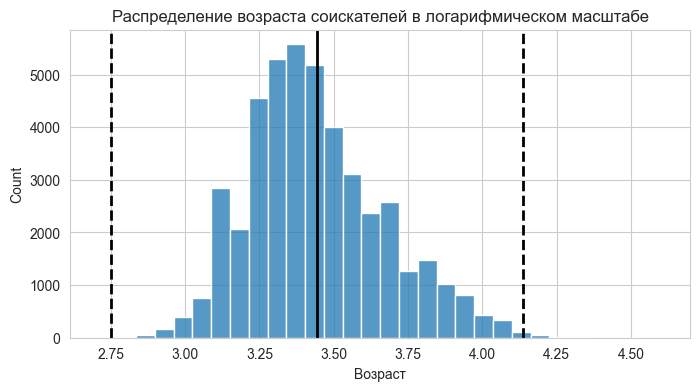

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # построим гистограмму распределения возраста соискателей
log_data_age = np.log(hh_data_dedupped_cleaned['Возраст'])
histplot = sns.histplot(
    data = log_data_age,
    bins=30,
    ax=ax
)
histplot.axvline(log_data_age.mean(), color='k', lw=2)
histplot.axvline(log_data_age.mean()+ 3 * log_data_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_data_age.mean()- 3 * log_data_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста соискателей в логарифмическом масштабе');

##### Полученный график показывает какие наблюдения попадают в интервал, а какие считаются выбровами. На графике видно, что среднее значение (вертикальная линия посередине) находится правее моды. Это свойство распределений с правосторонней асимметрией. Также справа видны наблюдения, которые не вошли в наш интервал (несколько значений правее верхней границы, обозначенной пунктирной линией). И если немного (на 1 сигму) «сдвинуть» верхнюю границу вправо, то мы захватим эти наблюдения. Внесем корректировки.

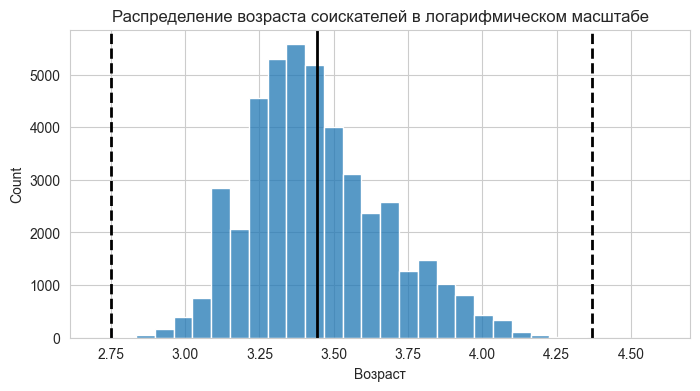

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # построим гистограмму распределения возраста соискателей
log_data_age = np.log(hh_data_dedupped_cleaned['Возраст'])
histplot = sns.histplot(
    data = log_data_age,
    bins=30,
    ax=ax
)
histplot.axvline(log_data_age.mean(), color='k', lw=2)
histplot.axvline(log_data_age.mean()+ 4 * log_data_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_data_age.mean()- 3 * log_data_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста соискателей в логарифмическом масштабе');

#### Очистим данные от выбросов связанных с возрастом. Удалим резюме соискателей в возрасте до 16 лет и более 77 лет. 

In [124]:
def outliers_z_score(data, feature):  # создадим функцию для опрееделения выбросов и получения данных без выбросов
    x = np.log(data[feature])
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, hh_data_new = outliers_z_score(hh_data_dedupped_cleaned, 'Возраст')
outliers.shape

(3, 23)

#### Получаем итоговую таблицу, очищенную от дубликатов, пропусков и выбросов.

In [125]:
hh_data_new.info()   # получаем итоговую таблицу без дубликатов, пропусков и выбросов

<class 'pandas.core.frame.DataFrame'>
Index: 44482 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44482 non-null  object 
 1   Последнее/нынешнее место работы  44482 non-null  object 
 2   Последняя/нынешняя должность     44482 non-null  object 
 3   Обновление резюме                44482 non-null  object 
 4   Авто                             44482 non-null  object 
 5   Образование                      44482 non-null  object 
 6   Пол                              44482 non-null  object 
 7   Возраст                          44482 non-null  int64  
 8   Опыт работы (месяц)              44482 non-null  float64
 9   Город                            44482 non-null  object 
 10  Готовность к переезду            44482 non-null  bool   
 11  Готовность к командировкам       44482 non-null  bool   
 12  полная занятость       